<a href="https://colab.research.google.com/github/SarvjeetAnand/CIP-Data-Science-Internship/blob/main/Exploratory_Data_Analysis_Google_Play_Store_App_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Play Store App Review Analysis**

##### **Project Type**    - **EDA**
##### **Contribution**    - **Indivisual**

# **Problem Statement**



**Business problem Overview**

 The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>


Let's take a look at the data, which consists of two files:

* **playstore_data.csv:** contains all the details of the applications on Google 
Play. There are 13 features that describe a given app.
* **user_reviews.csv:** contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.


**Before getting into data,first explain you about the EDA analysis.**

1. What are the top categories on Play Store?
2. Which category has the most no. of installations?
3. How importance is the rating of the application?
4. Which categories from the audience should the app be based on?
5. Are majority of the apps Paid or Free?
6. How does the count of apps varies by Genres?
7. How does the last update has an effect on the rating?
8. How are ratings affected when the app is a paid one?
9. How are reviews and ratings co-related?
10. Lets us discuss the sentiment subjectivity.
11. Is subjectivity and polarity proportional to each other?
12. What is the percentage of review sentiments?
13. How is sentiment polarity varying for paid and free apps?
14. How Content Rating affect over the App?
15. Does Last Update date has an effects on rating?
16. Distribution of App update over the Year.
17. Distribution of Paid and Free app updated over the Month

# ***Let's Begin !***

## ***1. Know the Data***

### Import Libraries and Loading the Dataset

In [ ]:
# importing necessary libraries for future analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
playstore_data=pd.read_csv('/content/drive/MyDrive/Play store data/Copy of Play Store Data.csv')
review_data=pd.read_csv('/content/drive/MyDrive/Play store data/Copy of User Reviews.csv')

### **Basic Inspection of Dataset**

##### First view of Dataset

In [ ]:
#Combined view of first 5 and last 5 row of dataset
ps_data=pd.concat([playstore_data.head(),playstore_data.tail()])
ps_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#####  User  Review data Set combined view

In [ ]:
#Combined view of first 5 and last 5 row of user review dataset
review=pd.concat([review_data.head(),review_data.tail()])
review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


##### Dataset Rows & Columns count

In [ ]:
#shape of the Complete data set
playstore_data.shape

(10841, 13)

* Their are $13$ **Rows** and $10841$ **Columns** in the dataset.

In [ ]:
#features
print(playstore_data.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


#### <b>DataSet Information<b>

In [ ]:
#A summary information about the dataSet
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


####**let's have a look at our dataset :-**



* App :- Name of the App
* Category :- Category under which the App falls.
* Rating :- Application's rating on playstore
* Reviews :- Number of reviews of the App.
* Size :- Size of the App.
* Install :- Number of Installs of the App
* Type :- Whether the App is free/paid
* Price :- Price of the app (0 if it is Free)
* Content Rating :- Appropriate Target Audience of the App.
* Genres:- Genre under which the App falls.
* Last Updated :- Date when the App was last updated
* Current Ver :- Current Version of the Application
* Android Ver :- Minimum Android Version required to run the App




### **Data Cleaning**

##### **Data Cleaning and Handling the NaN values in the Data Set**


* We saw and also got the information about the dataset. Now we have to clean that attributes which have not to be useful.Data Cleaning is one of the most essential part of data analysis.
* We have to Replace all the Null values with the Average of their Columns or with not null values.

In [ ]:
#Checking null values
playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

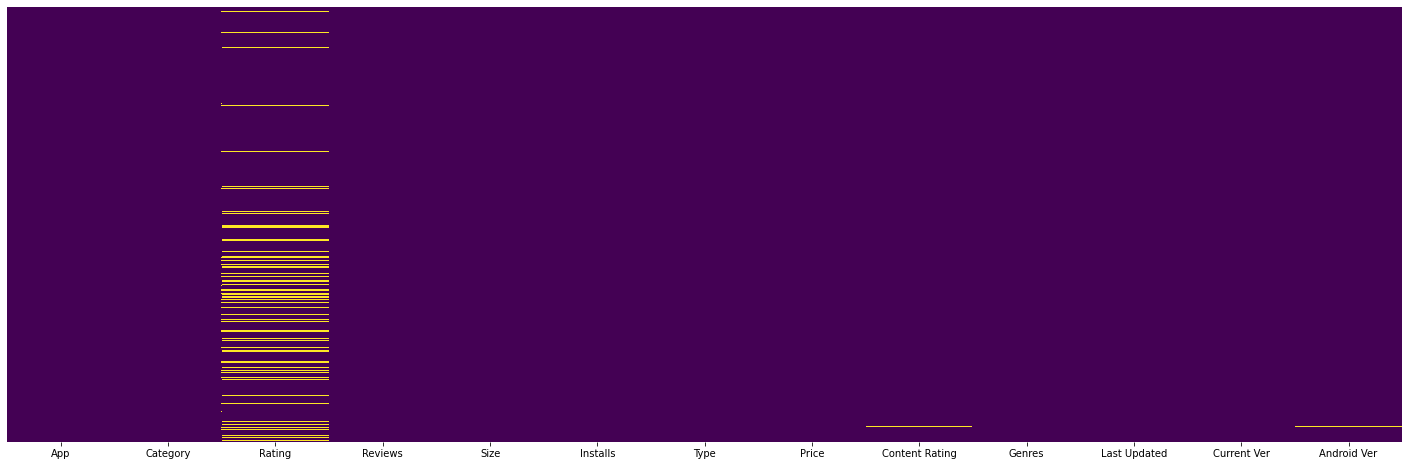

In [ ]:
# Visualization of null values 
plt.figure(figsize=(25,8))
sns.heatmap(playstore_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()


**The number of null values are:**

Rating has 1474 null values which contributes almost 14% of the data. Type and Content_Rating contributes 0.01% null values of the data. Current_Ver has 8 null values which contributes 0.07% of the data. Android_Ver contributes 0.03% null values of the data.

* Let's first deal with the columns which contains heigher number of NaN values.By going through the NaN values, we must come up with a way to replace them with non NaN values because it is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.
* We can replace the null values the aggregate (mean or median) of the remaining values in the Rating column.

In [ ]:
#replacing the null rating with their mean
playstore_data["Rating"].fillna(playstore_data["Rating"].mean(),inplace=True)
playstore_data["Rating"]=round(playstore_data["Rating"],2)


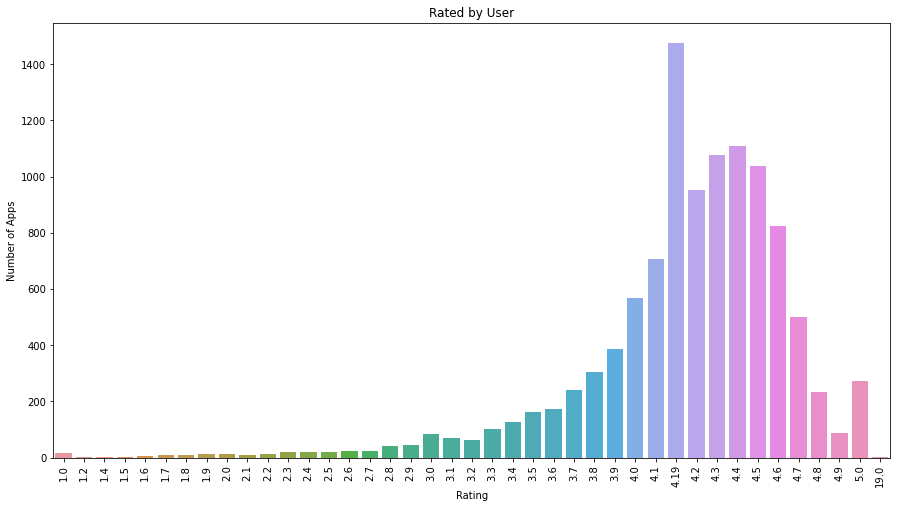

In [ ]:
#rating of apps
plt.figure(figsize=(15, 8))
sns.countplot(x='Rating', data=playstore_data)
plt.title('Rated by User')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

**we know that the rating of any app in the play store will be in between 1 and 5.
there are some ratings out of this range and remove the rating which is greater than 5.**


In [ ]:
#we know that the rating of any app in the play store will be in between 1 and 5.
#Lets check whether there are any ratings out of this range and remove the rating wich is greater than 5.
ps=playstore_data[playstore_data['Rating']>5].index[0]
print(ps)


10472


In [ ]:
playstore_data=playstore_data.drop(10472)

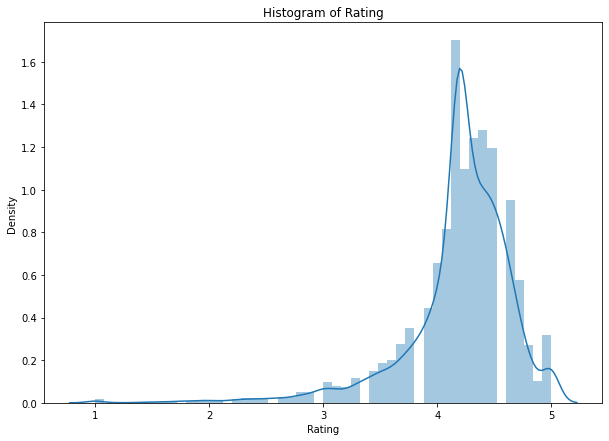

In [ ]:
# distplot with histogram
plt.figure(figsize=(10,7))
plt.title('Histogram of Rating')
sns.distplot(playstore_data['Rating'],hist=True)
plt.show()

**Current Ver and Android Ver Null value**

There are total 8 NaN values in Current Ver and 2 NaN Android Ver 

In [ ]:
# The rows containing NaN values in the Current Ver column
ps_null=playstore_data[playstore_data["Current Ver"].isnull()]
ps_null

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.20,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.10,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.20,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.19,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.00,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.19,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.19,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.19,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# Finding the different values the 'Current Ver' column takes
ps_count=playstore_data['Current Ver'].value_counts()
ps_count

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

In the Current Var Column there is no any particular value which replace the NAN values so we can replace it from dataframe due to less contribution. or we can replace it from it's last version.

In [ ]:
#checking null value in current version of app
playstore_data["Current Ver"] = np.where(playstore_data['Current Ver'] == "NaN", playstore_data['Current Ver'], playstore_data['Android Ver'])
playstore_data[playstore_data["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",NaN,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",NaN,NaN


In [ ]:
#There is no any version of android sop we can drop these column
playstore_data=playstore_data[playstore_data['Current Ver'].notna()]
playstore_data.shape

(10838, 13)


**Type: There is only one NaN value in this column**

In [ ]:
playstore_data[playstore_data["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.19,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
#In the above cell price is 0 so we can say that type is free
playstore_data.Type.fillna('Free',inplace=True)

 **User review Dataset**

In [ ]:
#user Review dataset
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#Total null values in reviews dataset
review_data.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
#droping the null value 

review_data=review_data.dropna(inplace=False)


### **Handling duplicates values and Manipulating dataset:**

* **Changing the datatype of the Last Updated column from string to datetime**





In [ ]:
# Pandas to_datetime() function applied to the values in the last updated column helps for converting string Date time into Python Date time object.
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated'])
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,4.0.3 and up,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0.3 and up,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,4.0.3 and up,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,4.2 and up,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,4.4 and up,4.4 and up


* 

In [ ]:
#changing kilobytes to megabytes 
def kb_to_mb_converter(value):
  if 'M' in value:
    return float(value[:-1])
  elif 'K' in value:
    return float(value[:-1]/1024)
  else:
    return 0 

playstore_data.rename(columns = {'Size':'Size(Mb)'}, inplace = True)
playstore_data["Size(Mb)"]=playstore_data["Size(Mb)"].apply(lambda x: kb_to_mb_converter(x))
playstore_data['Size(Mb)'] =playstore_data['Size(Mb)'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

In [ ]:
# Definning a function to takes a string and replace the following characters if present, '+', ',' ,'$','NaN'
def func(num):
  if '+' in num:
    num = num.replace('+','')
  if ',' in num:
    num = num.replace(',','')
  if '$' in num:
    num = num.replace('$','')
  if 'NaN' in num:
    num = '0'
  else:
    pass
  return num

In [ ]:
#Changing the 'Installs' column values into valid numeric values
playstore_data['Installs'] = pd.to_numeric(playstore_data['Installs'].map(lambda x: func(x)))


#Changing the 'Price' column values into valid numeric values
playstore_data['Price'] = pd.to_numeric (playstore_data['Price'].map(lambda x:  func(x)))

#Changing the 'Reviews' column values into valid numeric values
playstore_data['Reviews'] = pd.to_numeric(playstore_data['Reviews'])
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10838 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10838 non-null  object        
 1   Category        10838 non-null  object        
 2   Rating          10838 non-null  float64       
 3   Reviews         10838 non-null  int64         
 4   Size(Mb)        10838 non-null  float64       
 5   Installs        10838 non-null  int64         
 6   Type            10838 non-null  object        
 7   Price           10838 non-null  float64       
 8   Content Rating  10838 non-null  object        
 9   Genres          10838 non-null  object        
 10  Last Updated    10838 non-null  datetime64[ns]
 11  Current Ver     10838 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


### What did I know about the dataset?

The given dataset is hand on experience of using app and about their functionality  from customers end on playstore , We have to analysis the reviews of customers and the insights behind it.

Playstore review analysis is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to provide a better experience of the product or service.

The above dataset has 10K+ rows and 13 columns.After removing the null value or missing value There are no mising values and duplicate values in the dataset.

## ***2. Understanding the Variables***

In [ ]:
# Dataset Columns
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(Mb)', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
#Dscribing of DataSet
playstore_data.describe()

,Rating,Reviews,Size(Mb),Installs,Price
count,10838.000000,1.083800e+04,10838.000000,1.083800e+04,10838.000000
mean,4.191471,4.442348e+05,18.141124,1.546719e+07,1.027420
std,0.478938,2.928025e+06,22.182542,8.503695e+07,15.951172
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,2.600000,2.000000e+03,0.000000
50%,4.200000,2.094000e+03,9.200000,1.000000e+05,0.000000
75%,4.500000,5.479050e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [ ]:
#for checking the unique entry in the data set
for i in playstore_data.columns.tolist():
  print("No. of unique values in ",i,"is",playstore_data[i].nunique(),".")

No. of unique values in  App is 9657 .
No. of unique values in  Category is 33 .
No. of unique values in  Rating is 40 .
No. of unique values in  Reviews is 6001 .
No. of unique values in  Size(Mb) is 182 .
No. of unique values in  Installs is 20 .
No. of unique values in  Type is 2 .
No. of unique values in  Price is 92 .
No. of unique values in  Content Rating is 6 .
No. of unique values in  Genres is 119 .
No. of unique values in  Last Updated is 1377 .
No. of unique values in  Current Ver is 33 .
No. of unique values in  Android Ver is 33 .


In [ ]:
#app bt their catogeries
playstore_data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
8 Ball Pool                                           7
Candy Crush Saga                                      7
                                                     ..
U-Craft Mobile                                        1
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9657, dtype: int64

## **3. Data Vizualization, Story telling & Experimenting with charts : Understand the relationships between variables**

**1.What are the top catogeries on playstore ?**

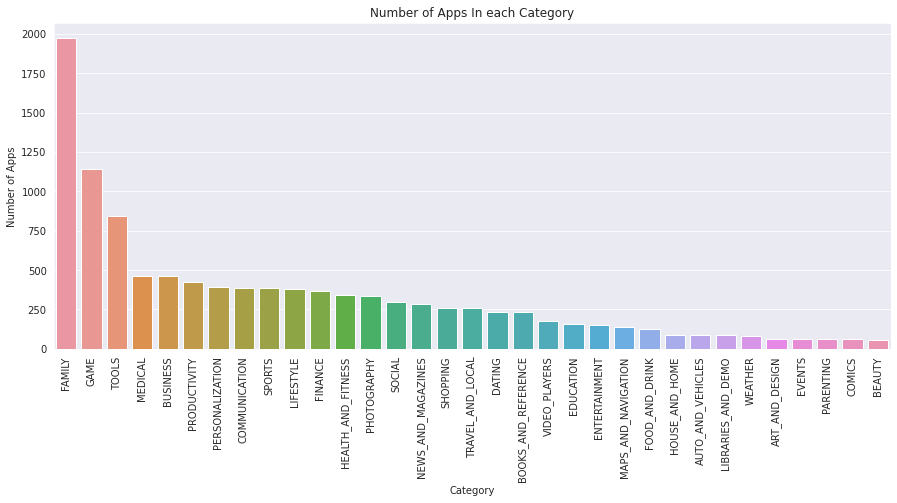

In [ ]:
#number of each catogery
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.countplot(x='Category', data=playstore_data ,order=playstore_data['Category'].value_counts().index)
plt.title('Number of Apps In each Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

There is total 33 categories inh the dataset and based on the 1st visualization ,We can clearly say that the majority of the apps on playstore fall into these Top 5 catogery.
*   Family
*   Games
*   Tools
*   Medical
*   Business

while the least number of apps lies under the
* Beauty
* comics catogery.



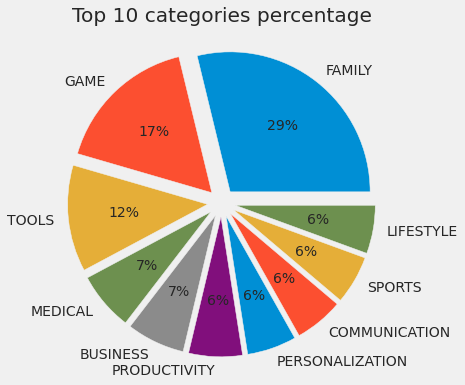

In [ ]:
#ploting the percentage of top 10 app
Top_categories=playstore_data['Category'].value_counts().reset_index().head(10)
Top_categories.rename(columns={'index':'Category','Category':'Count'},inplace=True)
plt.figure(figsize=(8,6))
plt.pie(Top_categories['Count'],labels=Top_categories['Category'],autopct='%.0f%%',explode=[0.1]*10)
plt.title('Top 10 categories percentage')
plt.show()

**2.Which catogeries has the most number of Installation?**

In [ ]:
# here we are using group by function to group category and installs.
grouped_data= playstore_data.groupby('Category')['Installs'].agg(np.sum)

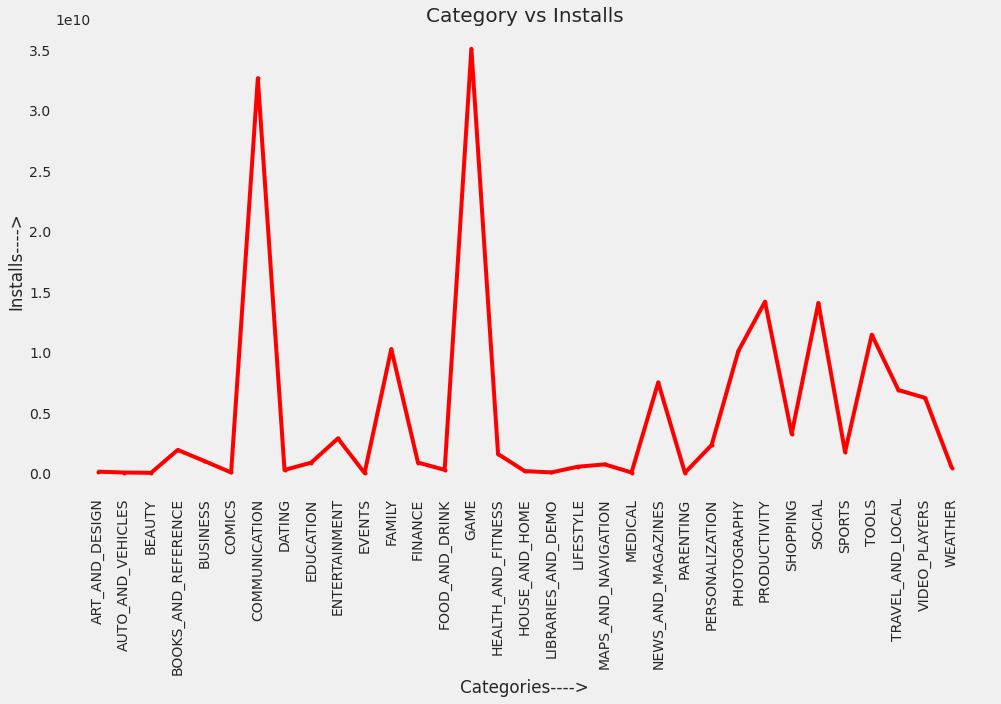

In [ ]:
# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(grouped_data ,  color='red', marker='.')
plt.xticks(rotation=90)
plt.xlabel('Categories---->')
plt.ylabel('Installs---->')
plt.title('Category vs Installs',size=20)
plt.show()

Based on above graph we can easily say that Games has atmost installation followed by Communication.

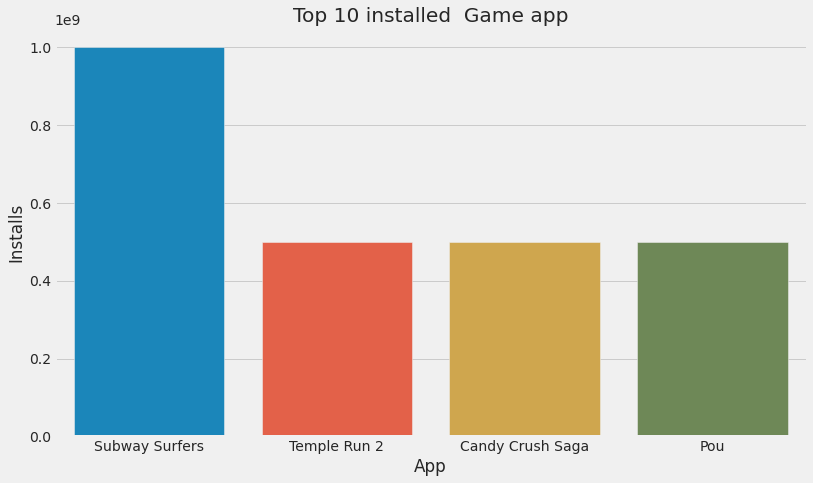

In [ ]:
#TOP 10 Enteries of Games 
top10 = playstore_data[playstore_data['Category'] == 'GAME'].sort_values(by='Installs',ascending=False).head(10)
plt.figure(figsize=(12,7))
plt.title('Top 10 installed  Game app')
sns.barplot(x=top10.App, y=top10.Installs)
plt.show()

Subway suffes has the most installation in the game catogery followed by Temple run 2,candy crush saga and pou

***Pricing Strategy***

**3.Are majority of the apps paid or free ?**








In [ ]:
# Total Number of free and paid app
playstore_data['Type'].value_counts()

Free    10039
Paid      799
Name: Type, dtype: int64

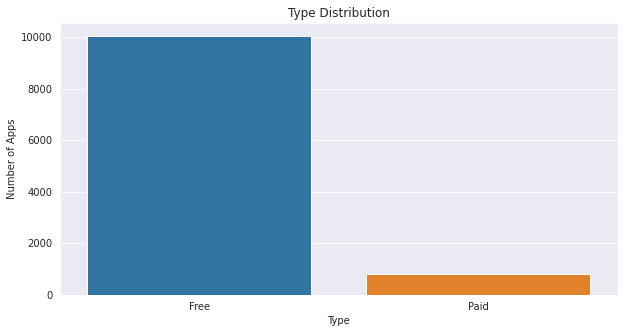

In [ ]:
# Type distribution of app in dataset
plt.figure(figsize=(10, 5))
sns.countplot(playstore_data['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

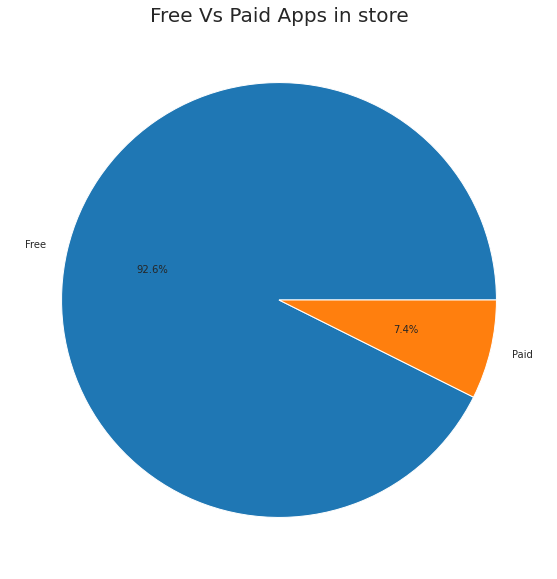

In [ ]:
#percentage of free vs paid

plt.figure(figsize=(10,10))
plt.title('Free Vs Paid Apps in store',size = 20)
plt.pie(playstore_data['Type'].value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')
plt.show()

Acording to the above countplot there is maximum free app is available on playstore.

*   There is total 10k+ free apps available on playstore.
*   And Only 799 apps are paid.
*   92% free app user on playstore and only 7.5% user are using paid feature.



**4.TOP 10 free app and top 10 expensive app**

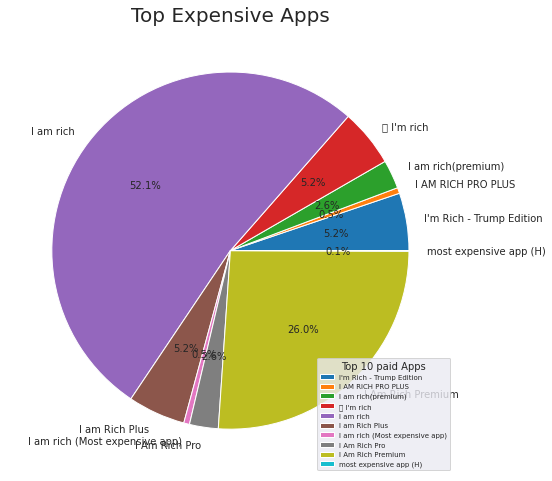

In [ ]:
#top 10 paid app analysis
top10paid=playstore_data[playstore_data['Type']=='Paid'].sort_values(by='Price',ascending=False).head(10)
plt.figure(figsize=(8,10))
plt.pie(top10paid.Installs,labels=top10paid.App, autopct='%1.1f%%')
plt.title('Top Expensive Apps',size = 20)
plt.legend(top10paid.App, loc="lower right",title="Top 10 paid Apps",fontsize='x-small')
plt.show()


Based on above pieplot we can  interpret that **'I am rich '** is the most expensive app in the google play store followed by **'I am Rich Premium'.**

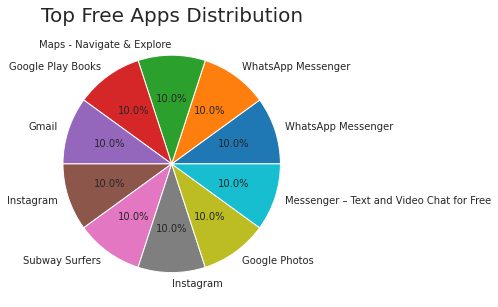

In [ ]:
#top 10 free app analysis
top10free=playstore_data[playstore_data['Type']=='Free'].sort_values(by='Installs',ascending=False).head(10)
plt.figure(figsize=(15,5))
plt.pie(top10free.Installs,explode=None,labels=top10free.App, autopct='%1.1f%%',startangle=0)
plt.title('Top Free Apps Distribution',size = 20)
plt.show()

**5.Which catogeries has the most number of installations by their types?**

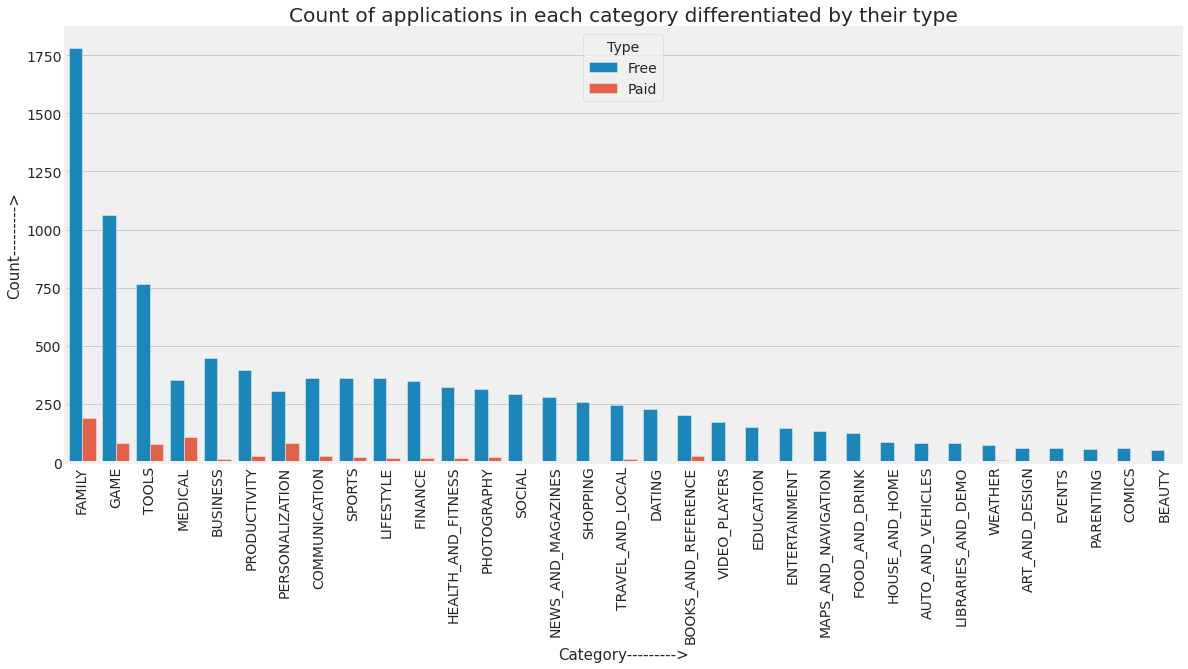

In [ ]:
#grouping the data
con_2=playstore_data.groupby(["Category","Type"])["App"].count().reset_index()

# we are plotting bar plot for above grouped dataframe


plt.figure(figsize=(20,8))
plt.style.use("fivethirtyeight")
sns.barplot(x="Category",y="App",hue="Type",data=con_2,order =playstore_data['Category'].value_counts().index)
plt.xlabel("Category--------->", fontsize=15)
plt.ylabel("Count--------->", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

Family category has maximum numbert of free app as well as paid app followed by Game category.

**6.How does the count of apps varies by genres?**

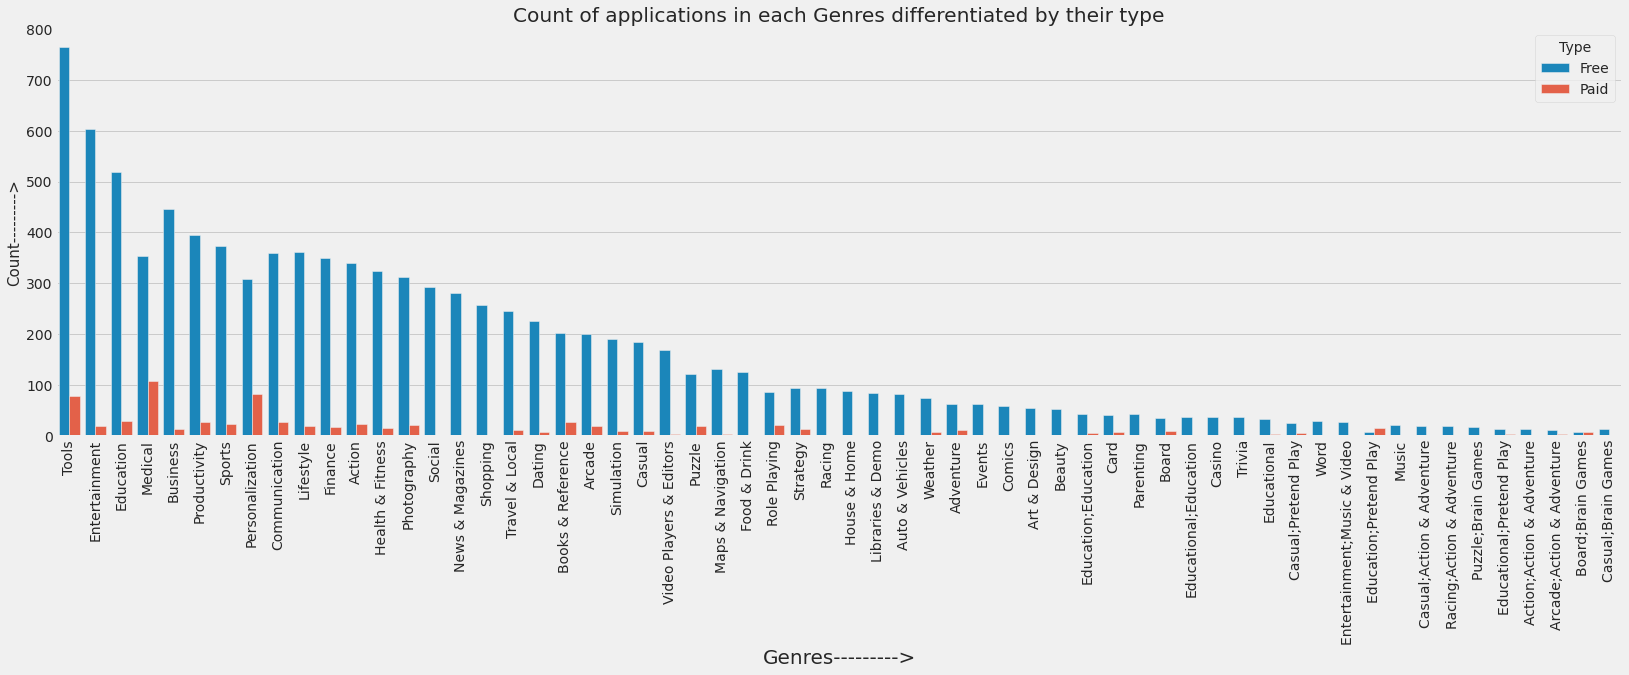

In [ ]:
con_3=playstore_data.groupby(["Genres","Type"])["App"].count().reset_index()
# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(25,7))
plt.style.use("fivethirtyeight")
sns.barplot(x="Genres",y="App",hue='Type',data=con_3,order=playstore_data['Genres'].value_counts().head(60).index)
plt.xlabel("Genres--------->", fontsize=20)
plt.ylabel("Count--------->", fontsize=15)
plt.title("Count of applications in each Genres differentiated by their type")
plt.xticks(rotation=90)
plt.show();

**7.Category vs Rating**

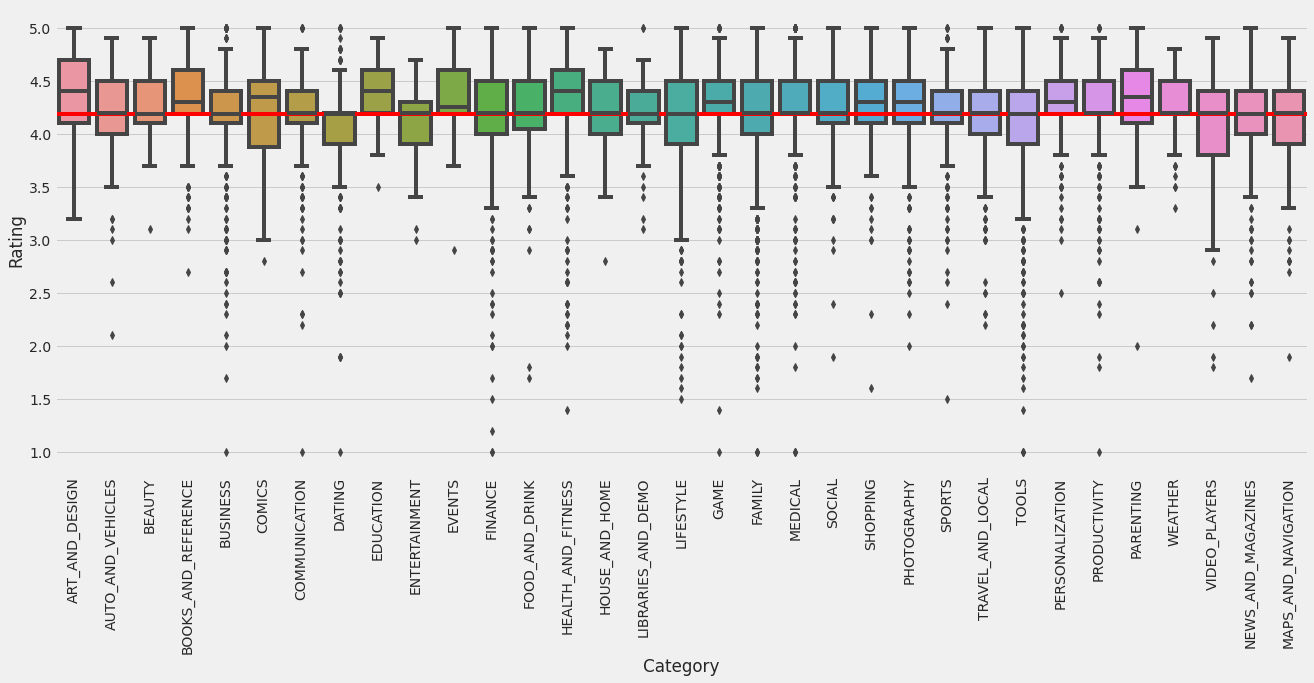

In [ ]:
#category vs rating vbased on type
plt.figure(figsize=(20,8))
sns.boxplot(data=playstore_data,x='Category',y='Rating').axhline(playstore_data['Rating'].mean(),ls="-",color="red")
plt.xticks(rotation=90,)
plt.show()

Red line is for average rating which is 4.19

**8.Content Rating**

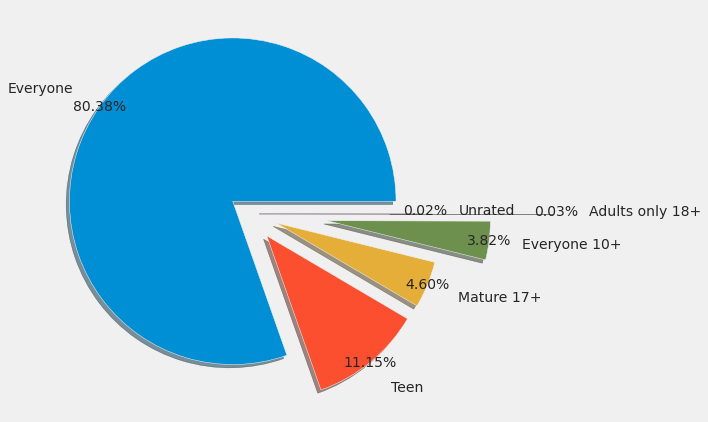

In [ ]:
plt.figure(figsize=(10,7))

plt.pie(playstore_data['Content Rating'].value_counts(),explode=(0.1,0.2,0.2,0.5,0.9,0.1),autopct='%1.2f%%',pctdistance=1,labeldistance=1.2,shadow=True ,labels=('Everyone','Teen','Mature 17+','Everyone 10+','Adults only 18+','Unrated'))
plt.show()

content is rated by majority of the reviewer.

**9.Factors affecting on apps rating   ---> updation of app**

In [ ]:
#update the date in terms of year
playstore_data["Updated_year"]=playstore_data['Last Updated'].apply(lambda x:x.strftime('%Y')).astype('int64')


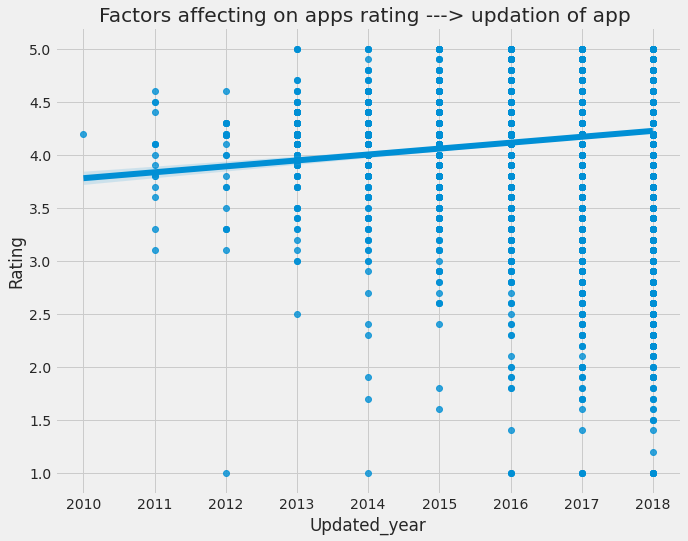

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Factors affecting on apps rating ---> updation of app ")
sns.regplot(x="Updated_year",y="Rating", data=playstore_data)
plt.show()

Getting more update of app is leading the rating.
means which app is getting update(getting new feature) user like that.

**10.Size--Light vs Bulky?**

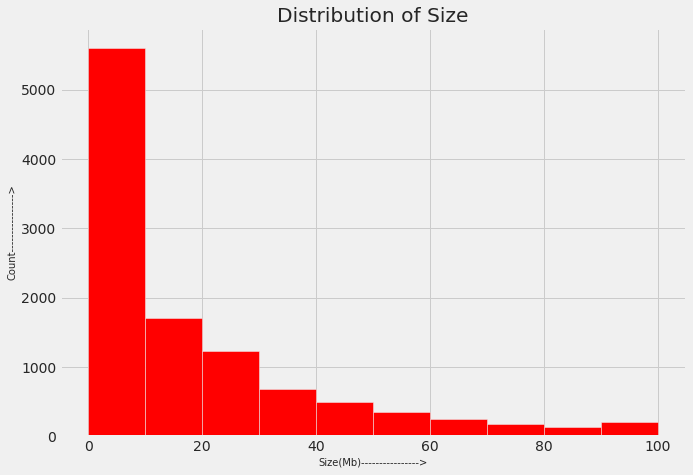

In [ ]:
#Distribution Size of App
plt.figure(figsize=(10,7))
plt.hist(playstore_data['Size(Mb)'],color="red")
plt.xlabel("Size(Mb)---------------->",fontsize=10)
plt.ylabel("Count---------------->",fontsize=10)
plt.title("Distribution of Size")
plt.show();

<Figure size 1008x648 with 0 Axes>

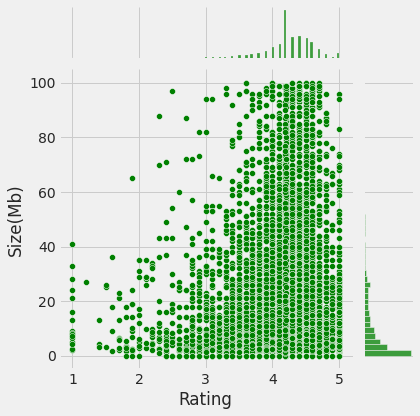

In [ ]:
plt.figure(figsize=(14,9))
sns.jointplot(data=playstore_data,y='Size(Mb)',x='Rating',kind='scatter',palette='list',color='green')
plt.show()

Here a pattern can be seen between size and rating.

On increasing Rating Size of app ia also increasing.But in maximum case This observation is just opposite.
Top rated apps has optimal size between 1Mb to 40Mb which is a normal(avg) means neither too light nor too heavy.

**11.Look at all the numeric interactions together**

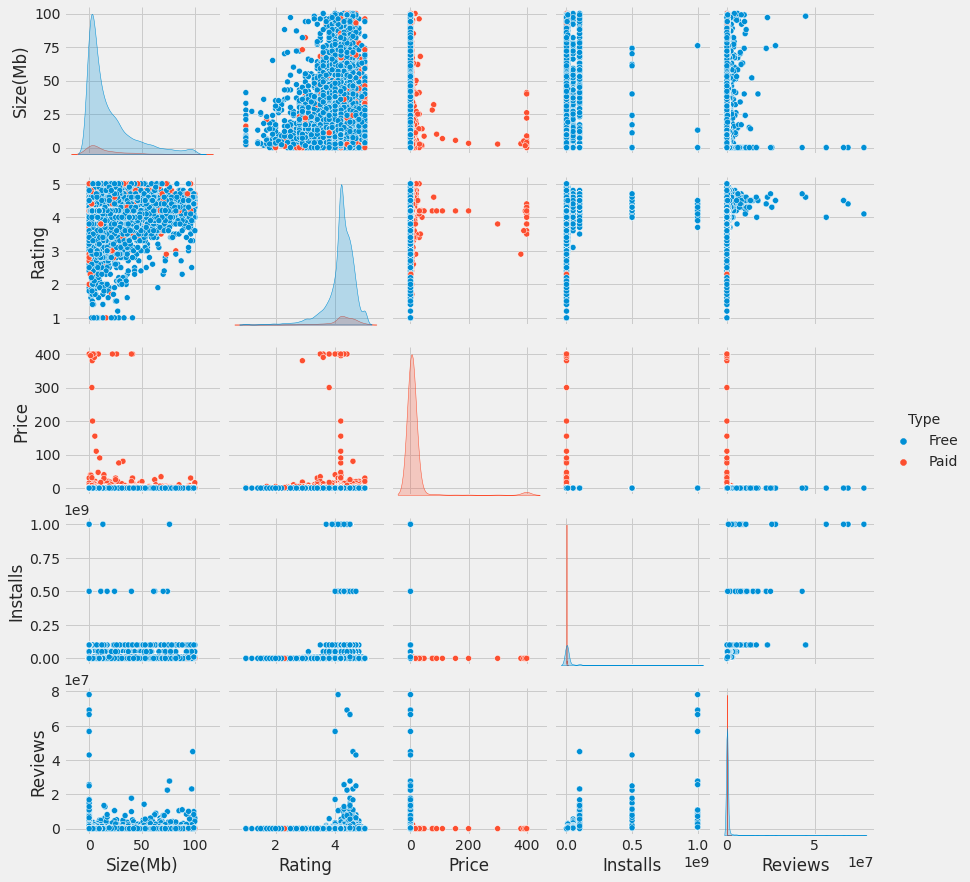

In [ ]:
sns.pairplot(playstore_data,hue='Type',vars=['Size(Mb)','Rating','Price','Installs','Reviews'])
plt.show()

**12.Analysing the Relationship between the Sentiment Subjectivity and Sentiment Polarity**

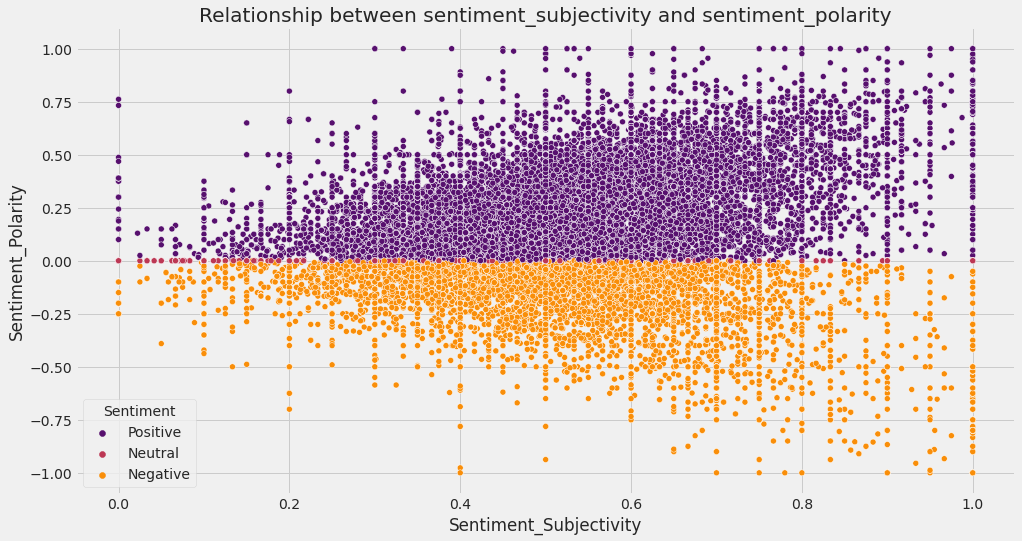

In [ ]:
#Plotting the relationship between sentiment_subjectivity and sentiment_polarity in scatter plot
plt.figure(figsize=(15,8))
sns.scatterplot(review_data['Sentiment_Subjectivity'], review_data['Sentiment_Polarity'],hue = review_data['Sentiment'], edgecolor='white', palette="inferno")
plt.title("Relationship between sentiment_subjectivity and sentiment_polarity")
plt.show()

From the above scatter plot , sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of cases, it shows a proportional behavior when variance is too high or low.



**13.Percentage of Review Sentiments**

In [ ]:
#user sentiment count 
review_data['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

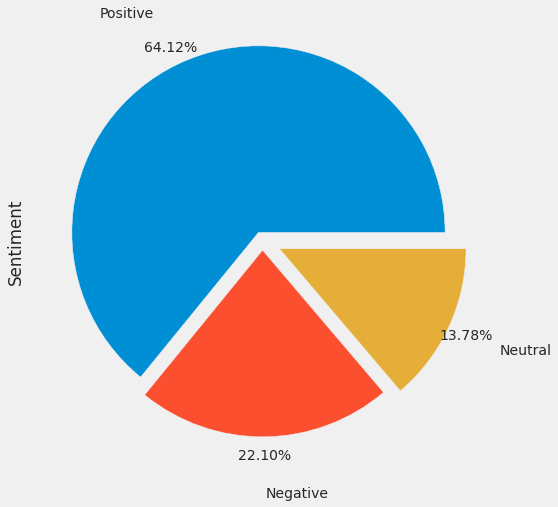

In [ ]:
#ploting graps of user sentiment
plt.figure(figsize=(10,8))
review_data['Sentiment'].value_counts().plot(kind='pie', explode= (0.05,0.05,0.1),autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.3)
plt.show()

In the above pie chart shows that the Positive reviews are in high, so according to this plot we can conlude that the over all (mostly) reviews are Positive because 
64% is a good number . 

*   Posiive reviews are **64.12%**
*   Negative reviews are **22.10%**
*   Neutral reviews are **13.78%**

If we assume that netural review is a bit positive then the percentage is almost 78%.
**The over all conclusion comes out after this visualizition is that reviews are positive.**

**14.How reviews and rating correlate each other**


> Coorelation of numerical data



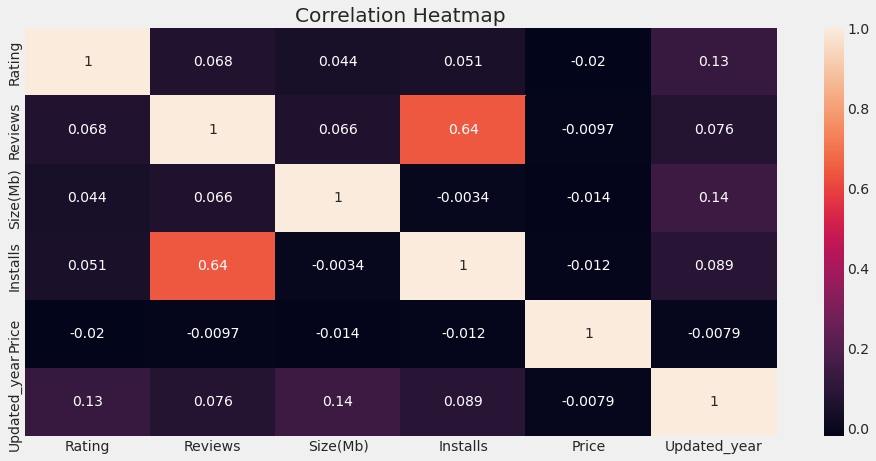

In [ ]:
# heatmap syntax(always ploted on correlation)

plt.figure(figsize=(15,7))
plt.title("Correlation Heatmap")
sns.heatmap(playstore_data.corr(),annot=True,robust=True)
plt.show();

*   As "Installs" vs "Reviews" have a correlation value of 0.64, shows perfect and strong correlationfrom above line chart as both "installs" and "Reviews" follow the same pattern approximately.

*   Reviews and rating coorelation values of 0.068 which is good.








## **4. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.


1.   Most of the applications available are free,So a company need to focus on free app segment.
2.   Content available for everyone will lead the chance to getting a good number of users.
3.   App updation is also a factors having a large amount of user,It will attract more number of user.

4.   Sentiment of user is based on users need and also available features in app.
5.Users like mostly tools and games section as well as communication section too.
6.If companies want to more engagement on their they have to Gamified their content specially in educational app.
7.Also they can develop some good communication app.

# **Conclusion**

In this project, We have worked on various parameters that would help to know better about the app which is available on playstore.

In the primary phase,We have focused on problem statement and key factors responsible for app engagement and success(problem statement).
After gathering the information about the dataset and understanding the problem statements ,We have done some necessarily data clearning, in order to ensure that provide a better visualization.

Based on Visualization outcome are following:

1. Average rating of(active) apps on Google Playstore is 4.19

2.   Most of the top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.

3.   Users tend to download a given app more if it has been reviewed by a large number of people.

4.  When it comes to free apps, users are more pessimistic and harsh than when it comes to paid apps.

5.   More than half users rate Family, Sports and Health & Fitness apps positively. Apps for games and social media get mixed reviews.
6. The proportion of free apps,paid apps and the average app size, these information are decidable factors for users to make download descision of application. 













